In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [3]:
data=pd.read_csv('StockDir/国农科技000004.sz.csv')

In [4]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,16.240000,16.010000,16.049999,16.059999,142400,16.059999
1,2019-01-03,16.320000,16.000000,16.059999,16.250000,214700,16.250000
2,2019-01-04,16.799999,16.010000,16.299999,16.600000,281500,16.600000
3,2019-01-07,17.400000,16.459999,16.610001,17.219999,521376,17.219999
4,2019-01-08,17.200001,16.799999,17.059999,16.809999,609046,16.809999


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 7 columns):
Date         321 non-null object
High         321 non-null float64
Low          321 non-null float64
Open         321 non-null float64
Close        321 non-null float64
Volume       321 non-null int64
Adj Close    321 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 17.7+ KB


In [6]:
days=np.array([i for i in range(len(data['Date']))]).reshape(-1,1)

price=np.array(data['Close']).reshape(-1,1)


In [7]:
days_in_future=10
future_forcast = np.array([i  for i in range(len(days)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(days,price,test_size=0.40,shuffle=False)

In [9]:
X_train

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [23]:

c = [0.01,0.1,1]
gamma = [0.01, 0.1,1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
# degree = [4]
svm_grid = { 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}# 
# svm_grid = {'C': c,'gamma' : gamma,'degree':degree,'epsilon': epsilon}
svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train[-50:], y_train[-50:])


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished
g:\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='poly',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [24]:
print(svm_search.best_params_)
print(svm_search.best_estimator_)

{'shrinking': True, 'gamma': 0.01, 'epsilon': 0.1, 'C': 1}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [25]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed.fit(X_train,y_train)
svm_pred = svm_confirmed.predict(future_forcast)

g:\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 5.04053751443045
MSE: 32.21654679733968


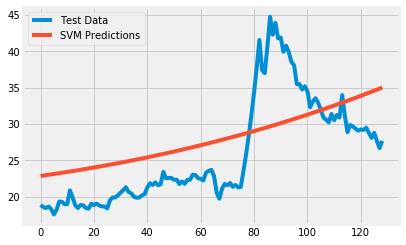

In [26]:
svm_test_pred = svm_confirmed.predict(X_test)
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(['Test Data','SVM Predictions'])
print('MAE:',mean_absolute_error(svm_test_pred,y_test))
print('MSE:',mean_squared_error(svm_test_pred,y_test))

In [14]:
poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_future_forcast = poly.fit_transform(future_forcast)

In [51]:
bayesian_poly = PolynomialFeatures(degree=1)
bayesian_poly_X_train = bayesian_poly.fit_transform(X_train)
bayesian_poly_X_test = bayesian_poly.fit_transform(X_test)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

MAE: 3.7528171223868116
MSE: 38.28609138129144


g:\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
g:\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
g:\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
g:\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be use

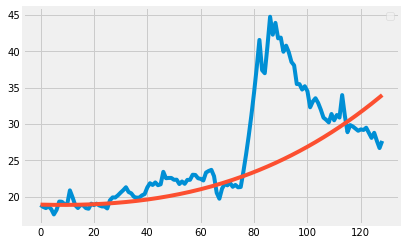

In [45]:
linear_model = LinearRegression(normalize=True,fit_intercept=False)
linear_model.fit(poly_X_train,y_train)
test_linear_pred = linear_model.predict(poly_X_test)
linear_pred = linear_model.predict(poly_future_forcast)
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend('Test Data','Linear Predictions')
print('MAE:',mean_absolute_error(test_linear_pred,y_test))
print('MSE:',mean_squared_error(test_linear_pred,y_test))

In [46]:
print(linear_model.coef_)

[[ 1.40373249e+01  1.95333216e-01 -1.58902943e-03  3.66711417e-06]]


In [52]:
tol = [0.01,0.1,1,10,100,1000]
alpha_1 = [0.01,0.1,1,10,100,1000]
alpha_2 = [0.01,0.1,1,10,100,1000]
lambda_1 = [0.01,0.1,1,10,100,1000]
lambda_2 = [0.01,0.1,1,10,100,1000]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}
bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,bayesian_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
bayesian_search.fit(bayesian_poly_X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.4s finished
g:\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [0.01, 0.1, 1, 10, 100,
                                                    1000],
                                        'alpha_2': [0.01, 0.1, 1, 10, 100,
                                                    1000],
                                        'lambda_1': [0.01, 0.1, 1, 10, 100,
                                              

In [53]:
bayesian_search.best_params_

{'tol': 100,
 'normalize': True,
 'lambda_2': 1000,
 'lambda_1': 1000,
 'alpha_2': 0.01,
 'alpha_1': 0.1}

In [54]:
bayesian_confirmed =bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:',mean_absolute_error(test_bayesian_pred,y_test))
print('MSE:',mean_squared_error(test_bayesian_pred,y_test))

MAE: 5.018345419637445
MSE: 51.46709744318881


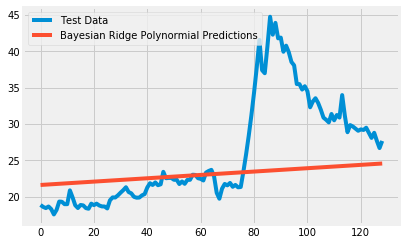

In [55]:
plt.plot(y_test)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data','Bayesian Ridge Polynormial Predictions'])

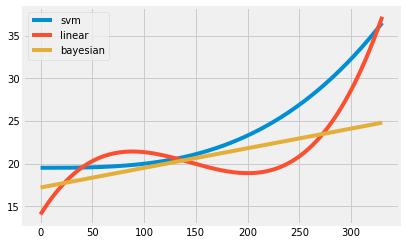

In [64]:
plt.plot(svm_pred,label='svm')
plt.plot(linear_pred,label='linear')
plt.plot(bayesian_pred,label='bayesian')
plt.legend(loc='best')